In [1]:
import sys
import os

parent_module_path = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))


sys.path.append(parent_module_path)
parent_module_path

'/workspaces/line-detection'

In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
image_path: str = "../../images/lane-detection-test-image.png"

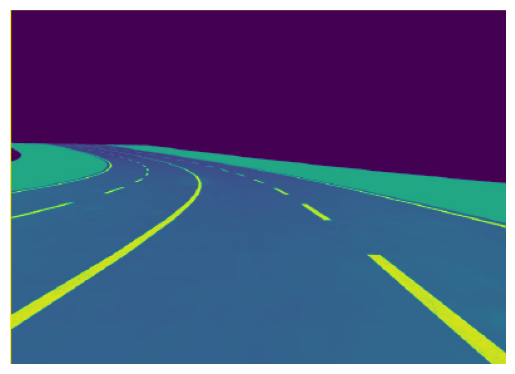

In [9]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
assert image is not None, f"Image not found at path: {image_path}"
plt.imshow(image)
plt.axis("off")
plt.show()

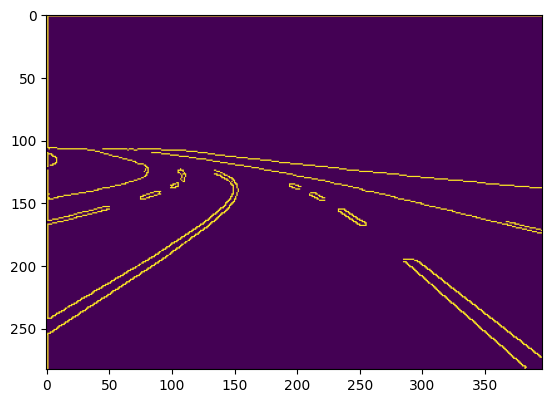

In [10]:
from src.project_utils.edge_detection import create_canny_edge_detection_img

edges = create_canny_edge_detection_img(image)

plt.imshow(edges)

In [11]:

import numpy as np

rho: float = 1 # distance resolution in pixels of the Hough grid
theta: float = np.pi/180 # angular resolution in radians of the Hough grid
threshold: int = 100 # minimum number of votes (intersections in Hough grid cell)
min_line_length: int = 100 # minimum number of pixels making up a line
max_line_gap: int = 10 # maximum gap in pixels between connectable line segments


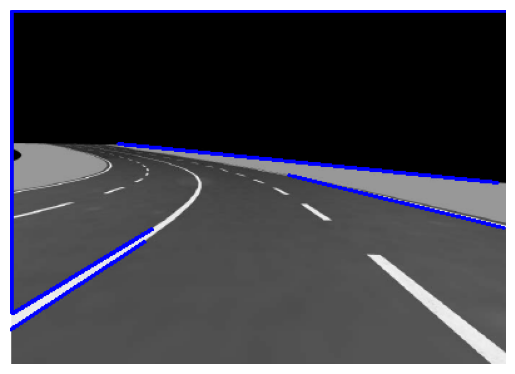

In [ ]:
lines = cv2.HoughLinesP(
    edges,
    rho=rho,
    theta=theta,
    threshold=threshold,
    minLineLength=min_line_length,
    maxLineGap=max_line_gap,
)

# Create a copy of the original image to draw lines on
line_image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB) # type: ignore

# Draw lines on the image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0] # type: ignore
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the image with lines
plt.imshow(line_image)
plt.axis("off")
plt.show()

In [8]:
for line in lines:
    print(line)

[[  1   1 395   1]]
[[  1 242   1   2]]
[[ 86 107 389 138]]
[[  2 242 113 175]]
[[  0 255 107 185]]
[[222 132 394 174]]
